### StateSchema Using DataClasses

* state schema represents the structure and types of data that our graph will use.
* all nodes are expected to communicate with that state schema.
* langgraph offers flexibility in how you define your state schema, accommodating various python types and validation approaches.

In [3]:
from typing_extensions import TypedDict
from typing import Literal
import random

class TypedDictState(TypedDict):
    name:str
    game:Literal['cricket', 'football']


In [16]:
def play_game(state:TypedDictState):
    print("---play_game node is called---")
    return {"name": state['name'] }

def cricket(state:TypedDictState):
    print("---cricket node is called---")
    return {"game": "cricket"}

def football(state:TypedDictState):
    print("---football node is called---")
    return {"game": "football"}

def decide_game(state:TypedDictState)-> Literal['cricket', 'football']:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "football"




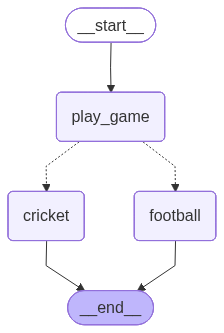

In [17]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(TypedDictState)

graph.add_node("play_game", play_game)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

graph.add_edge(START, "play_game")
graph.add_conditional_edges("play_game", decide_game)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

#compiling graph
graph_builder = graph.compile()
graph_builder

In [18]:
graph_builder.invoke({"name": 123})

---play_game node is called---
---football node is called---


{'name': 123, 'game': 'football'}

##### Observations:

* TypedDict are type hints, they can be used by static type checkers or IDEs to catch potential type-related errors before the code is run. But they are not enforced at runtime.

### Using Dataclasses:

* Python's dataclasses provide another way to define structured data.
* Dataclasses offer a concise syntax for creating classes that are primarily used to store data.

In [19]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    name:str
    game:Literal['cricket', 'football']

In [28]:
def play_game(state:DataclassState):
    print("---play_game node is called---")
    return {"name": state.name }

def cricket(state:DataclassState):
    print("---cricket node is called---")
    return {"game": "cricket"}

def football(state:DataclassState):
    print("---football node is called---")
    return {"game": "football"}

def decide_game(state:DataclassState)-> Literal['cricket', 'football']:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "football"

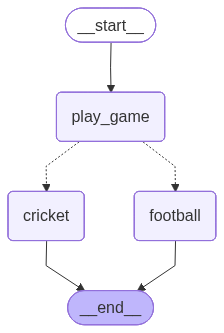

In [29]:
graph = StateGraph(DataclassState)

graph.add_node("play_game", play_game)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

graph.add_edge(START, "play_game")
graph.add_conditional_edges("play_game", decide_game)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

#compiling graph
graph_builder = graph.compile()
graph_builder

In [32]:
graph_builder.invoke(DataclassState(name="Mounica", game="cricket"))

---play_game node is called---
---cricket node is called---


{'name': 'Mounica', 'game': 'cricket'}

In [34]:
graph_builder.invoke(DataclassState(name=123
                                    , game="cricket"))

---play_game node is called---
---cricket node is called---


{'name': 123, 'game': 'cricket'}